In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pylab as plt
from skimage import io
from skimage import img_as_uint
from stretchablecorr import *

In [3]:
from skimage.data import rocket

(427, 640, 3)
(150, 322)


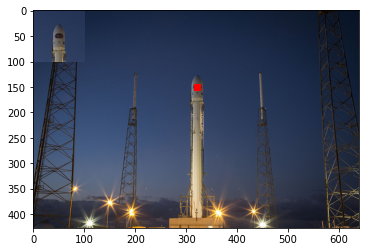

In [8]:
# ======
#  Crop
# ======
x, y = (322, 150)
plt.imshow(rocket());
print(rocket().shape)
plt.plot(x, y, 'sr');
C, ij = crop(rocket(), (x, y), 50)
plt.imshow(C);
print(ij)

In [9]:
C, ij = crop(rocket(), (322.2, 150.8), 50)
print(ij)

(151, 322)


In [10]:
# ============
#  get shifts
# ============

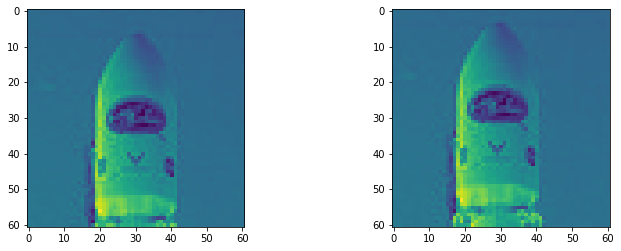

In [11]:
I = rocket().mean(axis=2)

window_half_size = 30
A, ij = crop(I, (322, 150), window_half_size)
B, ij = crop(I, (323, 153), window_half_size)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.imshow(A);
ax2.imshow(B);
# shifts  = -1, -3

In [17]:
get_shifts(A, B, window_half_size, window_half_size,
           window_half_size=15,
           offset=(0.0, 0.0),
           coarse_search=False,
           upsample_factor=100,
           method='skimage')

(-1.01, -2.93, 0.11381233475481252)

In [18]:
get_shifts(A, B, window_half_size, window_half_size,
           window_half_size=10,
           offset=(0.0, 0.0),
           coarse_search=True,
           upsample_factor=100,
           method='skimage')

(-1.0, -3.0, 1.8250120749944284e-08)

In [20]:
get_shifts(A, B, window_half_size, window_half_size,
           window_half_size=10,
           coarse_search=True,
           method='opti')

(-1.0, -3.0, 0)

In [21]:
%%timeit
get_shifts(A, B, window_half_size, window_half_size,
           window_half_size=10,
           coarse_search=True,
           method='opti')

2.2 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%timeit
get_shifts(A, B, window_half_size, window_half_size,
           window_half_size=10,
           coarse_search=True,
           method='skimage')

1.48 ms ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
